In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# NLP Package
import nltk
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import words
  
# Misc.
import re

#### Hello World in Data Science

In [4]:
df = pd.read_csv('data/train.csv', sep=',')

In [5]:
df.head()

,id,content,sentiment
0,1960353321,"@bex_1210 holy crap, I need to see that! Too b...",happy
1,1753218598,HAPPY MOTHER'S DAY to all of the wonderful wom...,happy
2,1961368089,Wishing I could be in NOLA this weekend oh we...,happy
3,1961456147,"What a day! #dayofservice completed, and now a...",happy
4,1962477969,@JamesMurphy anything to sell an album. poor t...,sad


In [6]:
df.tail()

,id,content,sentiment
23995,1957523762,I have been playing skate for two hours. Now i...,happy
23996,1965999020,im wearing a certain tye dye tshirt at the mom...,sad
23997,1694258339,@DeepaPrabhu Thanks and thanks,happy
23998,1964535265,@scottisafool I had a analog tuner the MC tea...,sad
23999,1962064791,Just watched the &quot;Final Break&quot; final...,happy


In [7]:
df.drop(labels= 'id', axis= 1, inplace= True)

In [8]:
df.head()

,content,sentiment
0,"@bex_1210 holy crap, I need to see that! Too b...",happy
1,HAPPY MOTHER'S DAY to all of the wonderful wom...,happy
2,Wishing I could be in NOLA this weekend oh we...,happy
3,"What a day! #dayofservice completed, and now a...",happy
4,@JamesMurphy anything to sell an album. poor t...,sad


In [9]:
sentiment = df['sentiment']
sentiment.value_counts()

happy      9180
sad        8174
neutral    5786
fury        860
Name: sentiment, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


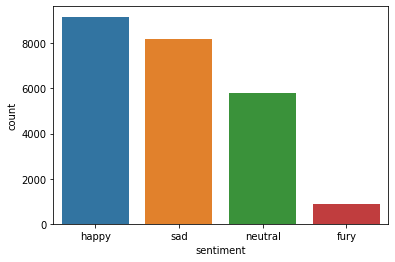

In [10]:
g = sns.countplot(sentiment)

#### Text Exploration 

In [11]:
# Raw exploration
corpus = []
for content in df['content']:
    corpus.append(content)
corpus = ' '.join(corpus)

In [12]:
print('Word/Character/Symbol/Anything count in corpus:', len(corpus))

Word/Character/Symbol/Anything count in corpus: 1795146


In [13]:
# Tokenization
def tokenizer(text):
    return text.split(' ')

tokenised_corpus = tokenizer(corpus)
print('Number of tokens:', len(tokenised_corpus))
tokenised_unique = set(tokenised_corpus)
print('Number of unique tokens:', len(tokenised_unique))

Number of tokens: 329309
Number of unique tokens: 56965


In [14]:
# Word freqdist
fdist = FreqDist(tokenised_corpus)
fdist.most_common(50)
sorted(fdist.most_common(), key = lambda x: x[1], reverse= False)

[('relaxful', 1),
 ('#dayofservice', 1),
 ('completed,', 1),
 ('Clearing', 1),
 ('Splitting', 1),
 ('@JamesMurphy', 1),
 ('@PRChels_BE', 1),
 ('Yellow', 1),
 ('Maybes', 1),
 ('Chelk.', 1),
 ('@SQLChicken', 1),
 ('Tail', 1),
 ('legs!', 1),
 ('@dpbkmb', 1),
 ('@prateek_agwl', 1),
 ('whom?', 1),
 ("'Shah", 1),
 ('Rukh', 1),
 ("Khan'", 1),
 ('imposter', 1),
 ('follow...', 1),
 ('@laurarenee411', 1),
 ('core.', 1),
 ('@Tyrese4ReaL', 1),
 ('Dean!', 1),
 ('breathe!', 1),
 ('@dever', 1),
 ('orbits-gravity-moon-space', 1),
 ('exploration-galaxy-exoplanets-universe-life', 1),
 ('earth-idea', 1),
 ('Gods-religions-philosophy-morality', 1),
 ('@miss_k_renee', 1),
 ('Different', 1),
 ('position!', 1),
 ('@AdamTheStudent', 1),
 ('gather?!', 1),
 ('@joyntheir', 1),
 ('keyboard.', 1),
 ('care!', 1),
 ('hallo', 1),
 ('@questredactie', 1),
 ('(2', 1),
 ('authors', 1),
 ('co-workers!', 1),
 ('@mohandoss', 1),
 ("'17", 1),
 ("Again'.", 1),
 ('@QueenofKong', 1),
 ('@gleannignacio', 1),
 ('17:00', 1),
 ('@C

All dem stop words... can add into the stopwords library for text preprocessing later. Some stopwords may have sentimental values ie to say, good, not etc..

In [15]:
# Functions for preprocessing
def lowercase(text):
    return [word.lower() for word in text]

def remove_non_letters(text):
    return [re.sub('[^a-z\s]', '', word) for word in text]

def tokenizer(text):
    return text.split(' ')

lemmatizer = WordNetLemmatizer() 
def lemmatization(text):
    # Lemmatization (it's almost always better than stemming...)
    return [lemmatizer.lemmatize(word) for word in text]

nltk_stopwords = stopwords.words("english")
spacy_stopwords = list(STOP_WORDS)
final_stopwords = list(set(nltk_stopwords + spacy_stopwords))
def remove_stopword(text):
    return [word for word in text if word not in final_stopwords]

def remove_whitespace(text):
    return [word for word in text if word != '']

def remove_handle(text):
    return [word for word in text if '@' not in word]

def convert_to_string(text):
    return ' '.join(text)

In [16]:
df['content'] = df['content'].apply(tokenizer)
df['content'] = df['content'].apply(lowercase)
print(df['content'] )

df['content'] = df['content'].apply(remove_handle)
df['content'] = df['content'].apply(remove_non_letters)
print(df['content'])

0        [@bex_1210, holy, crap,, i, need, to, see, tha...
1        [happy, mother's, day, to, all, of, the, wonde...
2        [wishing, i, could, be, in, nola, this, weeken...
3        [what, a, day!, #dayofservice, completed,, and...
4        [@jamesmurphy, anything, to, sell, an, album.,...
                               ...                        
23995    [i, have, been, playing, skate, for, two, hour...
23996    [im, wearing, a, certain, tye, dye, tshirt, at...
23997                  [@deepaprabhu, thanks, and, thanks]
23998    [@scottisafool, , i, had, a, analog, tuner, th...
23999    [just, watched, the, &quot;final, break&quot;,...
Name: content, Length: 24000, dtype: object
0        [holy, crap, i, need, to, see, that, too, bad,...
1        [happy, mothers, day, to, all, of, the, wonder...
2        [wishing, i, could, be, in, nola, this, weeken...
3        [what, a, day, dayofservice, completed, and, n...
4             [anything, to, sell, an, album, poor, thing]
            

In [17]:
df['content'] = df['content'].apply(remove_stopword)
df['content'] = df['content'].apply(lemmatization)
df['content'] = df['content'].apply(remove_stopword)
df['content'] = df['content'].apply(remove_whitespace)

In [18]:
df['content']

0           [holy, crap, need, bad, gotta, wait, tomorrow]
1        [happy, mother, day, wonderful, woman, great, ...
2               [wishing, nola, weekend, oh, ill, tuesday]
3        [day, dayofservice, completed, aching, clearin...
4                               [sell, album, poor, thing]
                               ...                        
23995    [playing, skate, hour, need, actually, skate, ...
23996    [im, wearing, certain, tye, dye, tshirt, momen...
23997                                     [thanks, thanks]
23998    [analog, tuner, mc, team, gave, year, ago, inb...
23999    [watched, quotfinal, breakquot, final, prison,...
Name: content, Length: 24000, dtype: object

In [19]:
words_list = words.words()
print(len(words_list))
def filter_gibberish(text):
    return [word for word in text if word in words_list]

236736


In [20]:
df['content'] = df['content'].apply(filter_gibberish)

df['content'] = df['content'].apply(convert_to_string)

In [21]:
df['content']

0                         holy crap need bad wait tomorrow
1               happy mother day wonderful woman great day
2                                   wishing weekend oh ill
3        day aching clearing tree beautiful lake splitt...
4                                    sell album poor thing
                               ...                        
23995                  skate hour need actually skate late
23996      wearing certain tye dye moment miss counterpart
23997                                        thanks thanks
23998       tuner team gave year ago driver handled driver
23999    watched final prison break episode great farew...
Name: content, Length: 24000, dtype: object

### Text Processing
1. tf-idf
2. encoding sentiments

In [22]:
# Encoding Sentiments
def sentiments_encoding(sentiment):
    sentiments = ['happy', 'sad', 'neutral', 'fury']
    return sentiments.index(sentiment)

df['sentiment'] = df['sentiment'].apply(sentiments_encoding)

In [23]:
df['sentiment'].value_counts()

0    9180
1    8174
2    5786
3     860
Name: sentiment, dtype: int64

In [24]:
df.head()

,content,sentiment
0,holy crap need bad wait tomorrow,0
1,happy mother day wonderful woman great day,0
2,wishing weekend oh ill,0
3,day aching clearing tree beautiful lake splitt...,0
4,sell album poor thing,1


In [25]:
df.to_csv("cleaned.csv")

In [26]:
test_df = pd.read_csv("cleaned.csv")
test_df.drop('Unnamed: 0', axis= 1, inplace= True)
test_df.dropna(axis=0, inplace= True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23240 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    23240 non-null  object
 1   sentiment  23240 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 544.7+ KB


In [27]:
# Prepare word vector 
cv = CountVectorizer()
words_sparse_matrix = cv.fit_transform(test_df['content'])
sparse_df = pd.DataFrame(columns= list(cv.get_feature_names()), data= words_sparse_matrix.A)
sparse_df

,aa,aba,abalone,abandon,abandoned,abbreviate,abiding,ability,able,abnormal,...,za,zac,zero,zeta,zimbabwe,zip,zo,zombie,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model

In [35]:
physical_devices = tf.config.experimental.list_physical_devices('GPU') 

In [36]:
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Flatten, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
print("Version: ", tf.__version__) # Check tf version
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE") # Check GPU status
#physical_devices = tf.config.experimental.list_physical_devices('GPU') # Config GPU
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Version:  2.3.1
GPU is NOT AVAILABLE


In [37]:
sparse_df

,aa,aba,abalone,abandon,abandoned,abbreviate,abiding,ability,able,abnormal,...,za,zac,zero,zeta,zimbabwe,zip,zo,zombie,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer()
tokenizer.fit_on_texts(test_df['content'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8303 unique tokens.


In [31]:
X = tokenizer.texts_to_sequences(test_df['content'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

y = test_df['sentiment']
y = to_categorical(y)
y.shape

Shape of data tensor: (23240, 250)


(23240, 4)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15570, 250) (15570, 4)
(7670, 250) (7670, 4)


In [33]:
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, 
                           output_dim=embedding_dim, 
                           input_length=MAX_SEQUENCE_LENGTH))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 50)           2500000   
_________________________________________________________________
flatten (Flatten)            (None, 12500)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3200256   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              5

In [34]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size= 64)

Epoch 1/50
244/244 [==============================] - 9s 36ms/step - loss: 0.4930 - accuracy: 0.4279 - val_loss: 0.4685 - val_accuracy: 0.4996
Epoch 2/50
244/244 [==============================] - 9s 36ms/step - loss: 0.4367 - accuracy: 0.5556 - val_loss: 0.4579 - val_accuracy: 0.5047
Epoch 3/50
244/244 [==============================] - 9s 36ms/step - loss: 0.3697 - accuracy: 0.6469 - val_loss: 0.5004 - val_accuracy: 0.4993
Epoch 4/50
244/244 [==============================] - 9s 36ms/step - loss: 0.2948 - accuracy: 0.7328 - val_loss: 0.5384 - val_accuracy: 0.4866
Epoch 5/50
244/244 [==============================] - 9s 38ms/step - loss: 0.2341 - accuracy: 0.7979 - val_loss: 0.6221 - val_accuracy: 0.4725
Epoch 6/50
244/244 [==============================] - 9s 37ms/step - loss: 0.1891 - accuracy: 0.8368 - val_loss: 0.7207 - val_accuracy: 0.4700
Epoch 7/50
244/244 [==============================] - 9s 36ms/step - loss: 0.1625 - accuracy: 0.8597 - val_loss: 0.7970 - val_accuracy: 0.4630

KeyboardInterrupt: 

In [ ]:
model.save('model.h5')

In [ ]:
predictions = model.predict()
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')